In [106]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})

In [107]:
import matplotlib.pyplot as plt

In [108]:
import elasticsearch
from elasticsearch import Elasticsearch, helpers
es = Elasticsearch([{'host': 'atlas-kibana.mwt2.org',
                     'port': 9200}])

In [114]:
src = 'CERN-PROD*'
dst = 'BNL-OSG*'

In [146]:
body_epochs="""{
  "query": {
    "filtered": {
      "query": {
        "query_string": {
          "query": "event_type:transfer-done AND payload.src-rse:%s AND payload.dst-rse:%s",
          "analyze_wildcard": true,
          "lowercase_expanded_terms": false}},
      "filter": {
        "bool": {
          "must": [{
              "range": {
                "@timestamp": {
                  "gt" : "16h"
                  "lt" : "20h"}}}]}}}},
  "_source": [
    "payload.file-size",
    "payload.transferred_at",
    "payload.duration"
  ],
  "fields": [
    "_source"
  ]}
"""

In [147]:
data = []
scanner = helpers.scan(client=es, query=body_epochs%(src, dst), scroll='1m',
                       index="rucio-events*", timeout="1m")
for hit in scanner:
    data.append((hit['_source']['payload']['file-size']/1000))

RequestError: TransportError(400, u'search_phase_execution_exception')

In [142]:
len(data)

13244

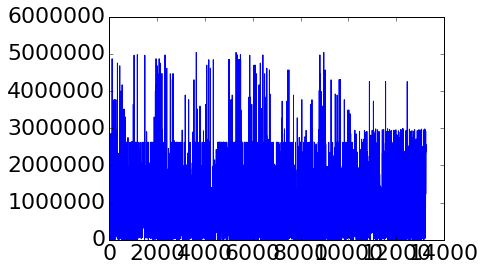

In [143]:
plt.plot(data)